# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
pd.read_csv("loan_data.csv")

2022-11-27 14:44:34.953164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 14:44:34.953192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**
 
- 🗺️ **Explore**: Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 **Visualize**: Plot histograms for every numeric column with a color element to segment the bars by `not_fully_paid`.
- 🔎 **Analyze**: Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df[df.isna()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cor = df.corr()
cor

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


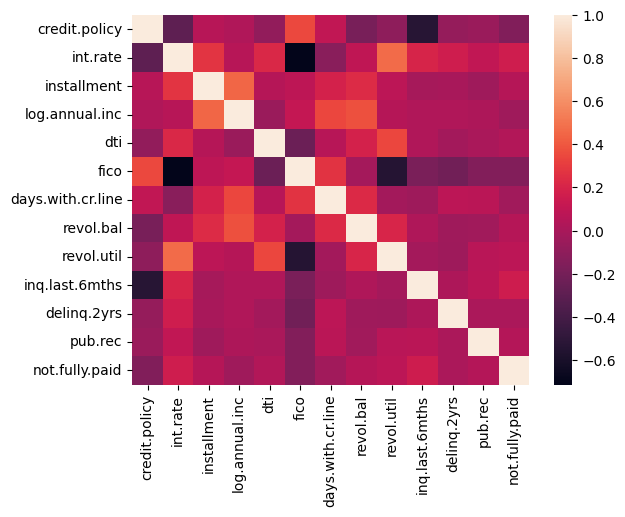

In [5]:
sns.heatmap(cor)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Try to predict the chance that the loan will not be fully paid ,, from correlation - select feature that correlate with the column- not fully paid the most. ( both positive and negative)

In [21]:
df = pd.get_dummies(df)

In [22]:
np.array(df.columns)
X_features = df.drop('not.fully.paid',axis = 1).values
y_feature = df['not.fully.paid'].values.reshape(-1,1)

In [23]:
y_feature , X_features

(array([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]),
 array([[1.0000e+00, 1.1890e-01, 8.2910e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 1.0710e-01, 2.2822e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 1.3570e-01, 3.6686e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 1.0710e-01, 9.7810e+01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.6000e-01, 3.5158e+02, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.3920e-01, 8.5343e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]))

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [25]:
scaler = StandardScaler()
logreg = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X_features,y_feature,test_size = 0.3)
pipeline = make_pipeline(scaler,logreg)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [29]:
y_pred = pipeline.predict(X_test)
y_pred[y_pred == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
pipeline.score(X_test,y_test)

0.8385525400139179

In [50]:
logreg.coef_

array([[-0.1279235 ,  0.06500468,  0.25186255, -0.26382652,  0.00247759,
        -0.31758875,  0.02921487,  0.07341362,  0.07967099,  0.19303942,
        -0.02645152,  0.04904072,  0.0717105 , -0.12449352, -0.09196865,
         0.0151443 ,  0.06297962, -0.04115945,  0.18737758]])

In [56]:
logreg.intercept_

array([-1.80861308])

In [65]:
# Visualize the coefficient of each columns 

In [64]:
list(zip(list(df.drop('not.fully.paid',axis = 1).columns),logreg.coef_.tolist()[0]))
    

[('credit.policy', -0.1279235039925734),
 ('int.rate', 0.06500467849641488),
 ('installment', 0.25186254538499747),
 ('log.annual.inc', -0.2638265204254477),
 ('dti', 0.002477594195102117),
 ('fico', -0.3175887527232432),
 ('days.with.cr.line', 0.02921487092944799),
 ('revol.bal', 0.07341362054401128),
 ('revol.util', 0.07967099260704927),
 ('inq.last.6mths', 0.19303941975754968),
 ('delinq.2yrs', -0.026451519021126253),
 ('pub.rec', 0.04904072264324239),
 ('purpose_all_other', 0.07171049936346145),
 ('purpose_credit_card', -0.12449352451126806),
 ('purpose_debt_consolidation', -0.091968650255523),
 ('purpose_educational', 0.01514429572872574),
 ('purpose_home_improvement', 0.06297961715516152),
 ('purpose_major_purchase', -0.04115944667735753),
 ('purpose_small_business', 0.1873775769148755)]

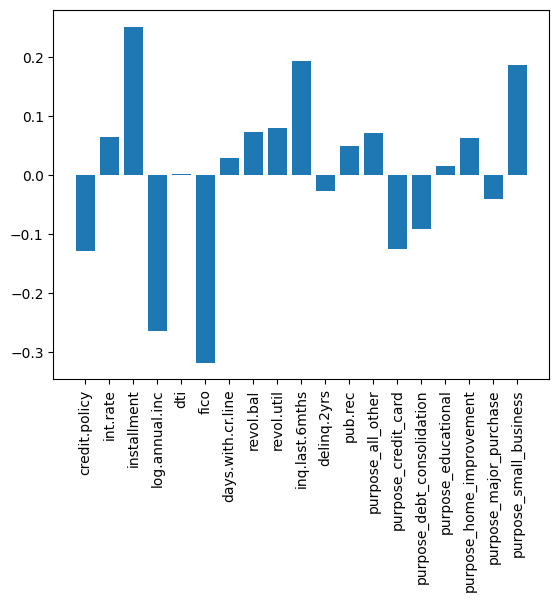

In [72]:
plt.bar(list(df.drop('not.fully.paid',axis = 1).columns),logreg.coef_.tolist()[0])
plt.xticks(rotation = 90)
plt.show()

pipeline score is 0.8385525400139179, the most negative correlation is fico while the most positive correlation to not fully paid is installment. 